<a href="https://colab.research.google.com/github/asim5800/Online-Retail-Customer-Segmentation-/blob/main/Online_Retail_Customer_Segmentation_Asim_siddiqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [105]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline



from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from plotnine import *

In [107]:
#load and read dataset
df = pd.read_excel('/content/drive/MyDrive/Online Retail Customer Segmentation-Asim Siddiqui/Online Retail.xlsx')

In [108]:
# checking dataset observations
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [109]:
#statistical description of dataset 
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [110]:
#checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#***Data Preprocessing***

In [111]:
#checking number of duplicate entries in dataset
print('Number of redundant entries in dataset:',df.duplicated().sum())

Number of redundant entries in dataset: 5268


In [112]:
#dropping redundant values
df.drop_duplicates(inplace = True)

In [113]:
#shape of dataset after dropping duplicates
df.shape

(536641, 8)

In [114]:
#checking out unique entries for each column in dataset 
for col in df:
    print(df[col].nunique())

25900
4070
4223
722
23260
1630
4372
38


In [115]:
# checking for observation where unit price is less than zero 
df[df.UnitPrice < 0].shape[0]

2

In [116]:
#determining number of observations where  quantity is less than 0 due to mishandling or incorrect data entry
len(df[(df['Quantity']<0)])

10587

In [117]:
#dropping those observations where quantity and unit price  are negative 
df1 = df.drop(df[(df.Quantity < 0)|(df.UnitPrice < 0)].index)

In [118]:
#statistical description of cleaned dataset 
df1.describe()

,Quantity,UnitPrice,CustomerID
count,526052.000000,526052.000000,392732.000000
mean,10.730911,3.913818,15287.734822
std,157.592136,36.053205,1713.567773
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


In [119]:
#information of new dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526052 non-null  object        
 1   StockCode    526052 non-null  object        
 2   Description  525460 non-null  object        
 3   Quantity     526052 non-null  int64         
 4   InvoiceDate  526052 non-null  datetime64[ns]
 5   UnitPrice    526052 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      526052 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.1+ MB


In [120]:
#dropping null values from dataset
df1.dropna(inplace=True)

In [121]:
#checking dataset after dropping null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [122]:
#Converting InvoiceNo to string type 
df1['InvoiceNo'] = df1['InvoiceNo'].astype('str')

In [123]:
#since 'C' means order cancelled 
df1['InvoiceNo'].str.contains('C').value_counts()

False    392732
Name: InvoiceNo, dtype: int64

In [124]:
#so we'll remove those values also
df1=df1[~df1['InvoiceNo'].str.contains('C')]

In [125]:
#information didn't change as it has already been taken care by  previous operations
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [126]:
#checking head values of dataset 
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [127]:
#extracting datetime information from the dataset
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [128]:
#adding day column in dataset
df1['Day']=df1['InvoiceDate'].dt.day_name()

In [129]:
#adding year, month, month day, hour information from InvoiceDate
df1["year"] = df1["InvoiceDate"].apply(lambda x: x.year)
df1["month"] = df1["InvoiceDate"].apply(lambda x: x.month)
df1["month_day"] = df1["InvoiceDate"].apply(lambda x: x.day)
df1["hour"] = df1["InvoiceDate"].apply(lambda x: x.hour)

In [130]:
#checking dataset after extracting information
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8


In [131]:
#shape of dataset after adding new features
df1.shape

(392732, 13)

#***Exploratory Data Analysis***

In [132]:
#checking unique countries in dataset
df1['Country'].nunique()

37

***So this online retail store serves in 37 countries according to given dataset.***

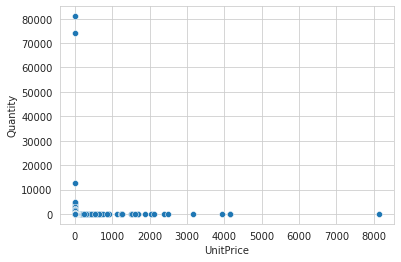

In [133]:
#scatterplot for quantity and unit price
sns.scatterplot(x='UnitPrice',y='Quantity',data=df1);

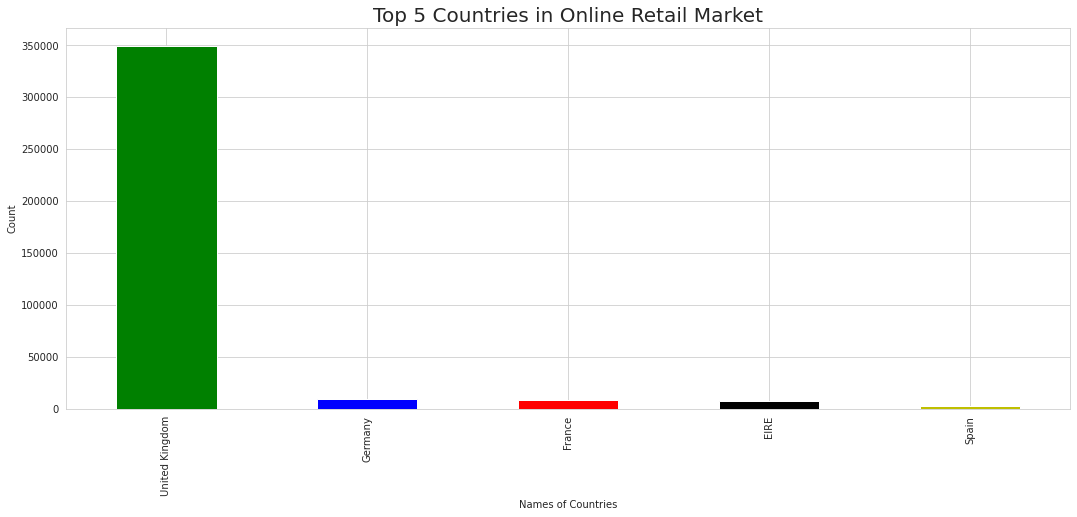

In [134]:
# plotting for top countries in the dataset
my_colors = ['g', 'b', 'r', 'k', 'y', 'm', 'c']
df1['Country'].value_counts().head(5).plot.bar(figsize = (18, 7),color=my_colors)
plt.title('Top 5 Countries in Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

***This shows that we have most number of customers from UK. After that Germany, France, EIRE and on fifth we have Spain.***

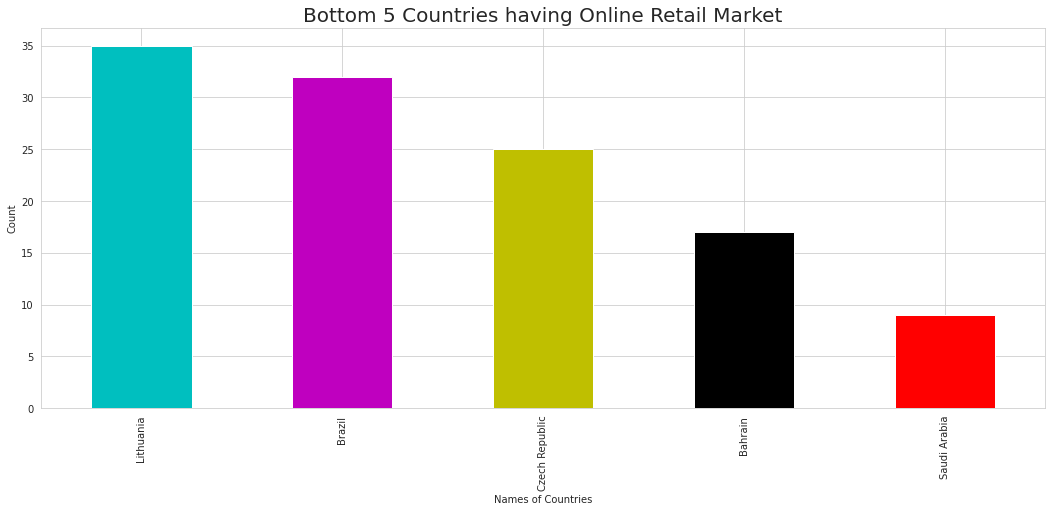

In [135]:
#plotting for bottom 5 countries in dataset 
my_colors = ['c', 'm', 'y', 'k', 'r', 'b', 'g']
df1['Country'].value_counts().tail(5).plot.bar(figsize = (18, 7),color=my_colors)
plt.title('Bottom 5 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

***This shows that we have very less number of customers from these countries especially middle east.***

***So in summary our retail working good in Europe continent.***  

In [136]:
#checking unique products in our dataset
df1['Description'].nunique()

3877

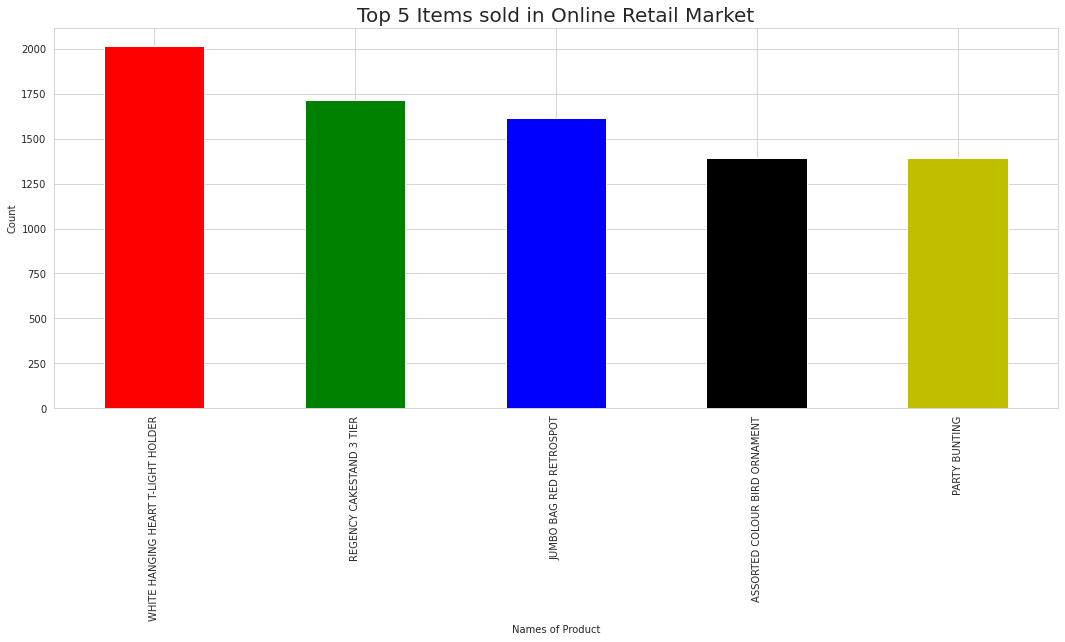

In [137]:
#plotting for top 5 products sold in retail market
my_colors1 = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
df1['Description'].value_counts().head(5).plot.bar(figsize = (18, 7),color=my_colors1)
plt.title('Top 5 Items sold in Online Retail Market', fontsize = 20)
plt.xlabel('Names of Product')
plt.ylabel('Count')
plt.show()

***In our retail market the most selling product is WHITE HANGING HEART T-LIGHT HOLDER followed by REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT, ASSORTED COLOUR BIRD ORNAMENT and PARTY BUNTING. In order to increase profitability we can manage our inventory according to these top sold items.***   

In [138]:
#Checking the last 200 products in dataset
df1['Description'].value_counts().tail(200)

CHERRY BLOSSOM PURSE                 1
WHITE STONE/CRYSTAL EARRINGS         1
HAPPY BIRTHDAY CARD TEDDY/CAKE       1
BLUE PADDED SOFT MOBILE              1
PINK BAROQUE FLOCK CANDLE HOLDER     1
                                    ..
ROCOCO WALL MIROR                    1
BIRTHDAY BANNER TAPE                 1
NECKLACE+BRACELET SET PINK DAISY     1
MONTANA DIAMOND CLUSTER EARRINGS     1
BLACK FINE BEAD NECKLACE W TASSEL    1
Name: Description, Length: 200, dtype: int64

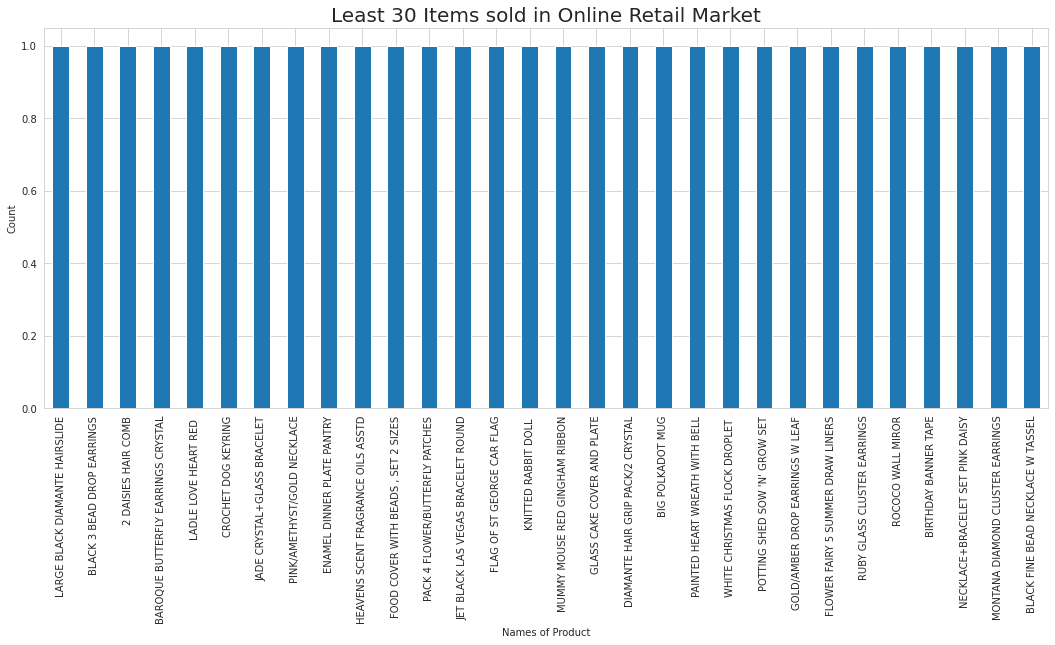

In [139]:
#plotting for the last 30 product sold in online market 
df1['Description'].value_counts().tail(30).plot.bar(figsize = (18, 7))
plt.title('Least 30 Items sold in Online Retail Market', fontsize = 20)
plt.xlabel('Names of Product')
plt.ylabel('Count')
plt.show()

***So we have list of worst performing products we can leverage our resources to have effective inventory and management techniques. We can focus less on these items as they're sold in very less quantity.***

In [140]:
#Checking number of unique customers
df1['CustomerID'].nunique()

4339

***So we have in total 4339 customers in our retail dataset.***

In [141]:
#checking how many times sprecific customer visited and purchased products
df1['CustomerID'].value_counts()

17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
           ... 
18233.0       1
18184.0       1
17846.0       1
14090.0       1
16093.0       1
Name: CustomerID, Length: 4339, dtype: int64

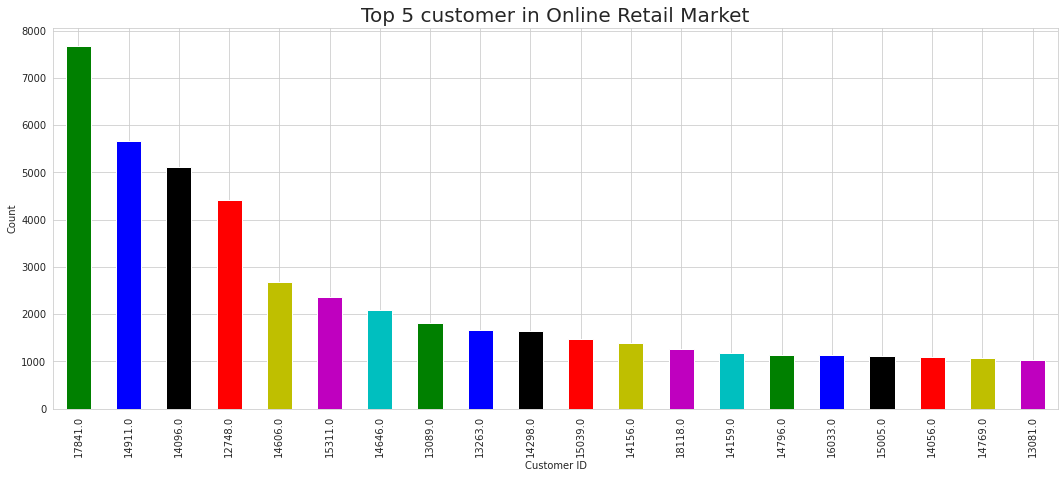

In [142]:
#plotting for top 20 customers in our retail stores
my_colors2 = ['g', 'b', 'k', 'r', 'y', 'm', 'c']
df1['CustomerID'].value_counts().head(20).plot.bar(figsize = (18, 7),color=my_colors2)
plt.title('Top 5 customer in Online Retail Market', fontsize = 20)
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.show()

***So we have these top 20 customers in our dataset we can make these customer as our premium or gold customers after inspecting their purchasing trends and behaviour.***

In [143]:
# creating function for plotting graph 
def plot_count(parameter,datasource):
   sns.set_style("whitegrid")
   fig, ax = plt.subplots()
   fig.set_size_inches(15, 9)
   p=sns.countplot(x=parameter, data=datasource)

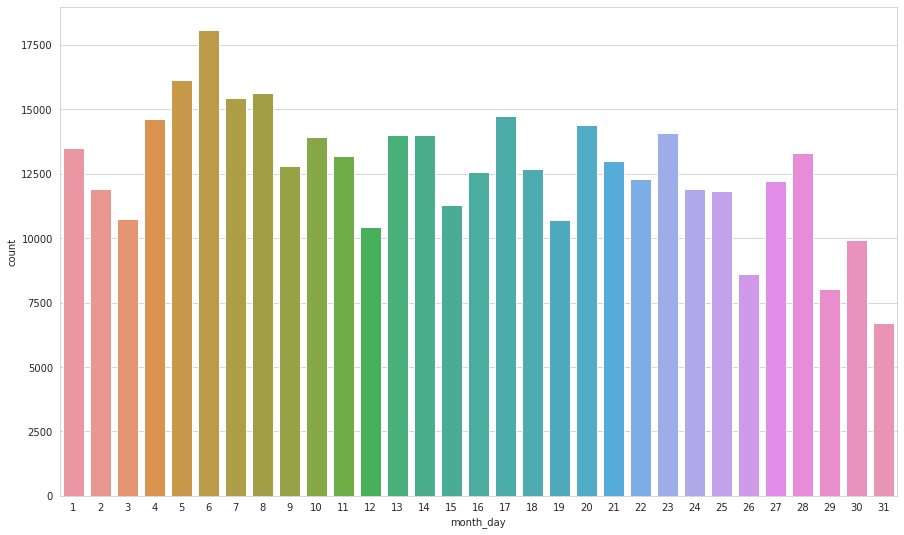

In [144]:
#visualising how months are performing dayswise in our dataset 
plot_count('month_day',df1)

***From this it is observed that we have good sales in first 8 days of the month specifically on 6th day. As we go towards month end the sales starts declining.***

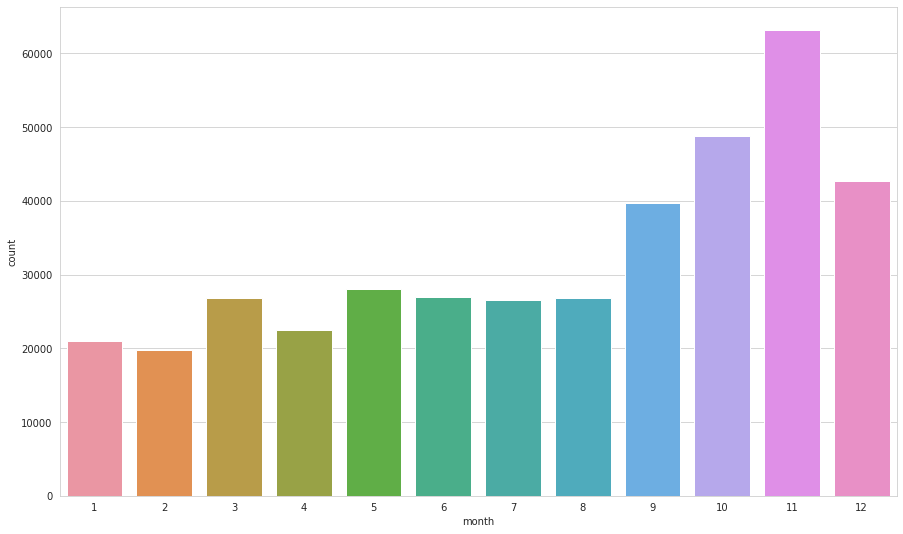

In [145]:
#visualising monthly trend in our dataset
plot_count('month',df1)

***Novemeber is the best performing month in our store. Also note that for second quarter we have consistent performance but as we move towards last quarter there is sudden hike.*** 

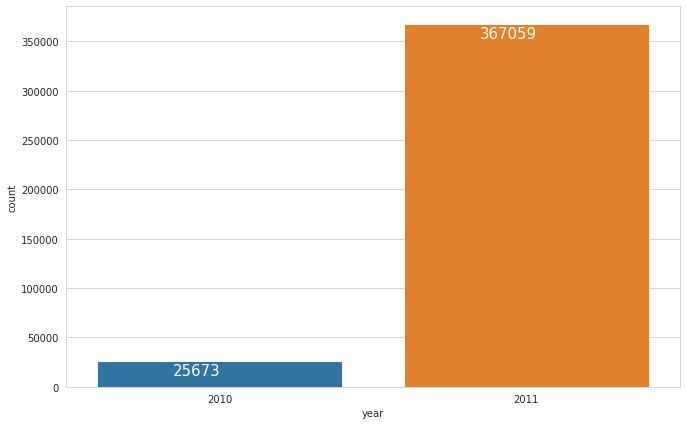

In [146]:
#visualising year wise observations in our dataset
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
op=sns.countplot(x='year', data=df1)

for p in op.patches:
    op.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), va='center', color='white', size=15)
plt.show()

***From this visualisation it can be observed as on an average in a month we have 25673 customers accessing and placing orders from our online store.*** 

In [147]:
#value counts of days
df1['Day'].value_counts()

Thursday     79260
Wednesday    68043
Tuesday      65747
Monday       64237
Sunday       61214
Friday       54231
Name: Day, dtype: int64

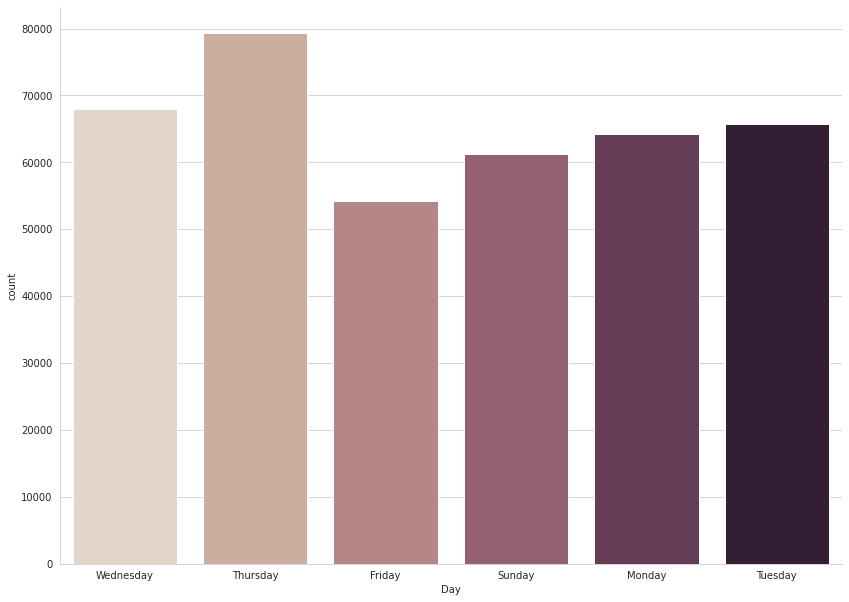

In [148]:
#plotting Day of the week present in our dataset
sns.catplot(x="Day", kind="count", palette="ch:.25", data=df1,height=8.27, aspect=11.7/8.27);

***As we can see that on Thursay we have most number of customers that are purchasing items. So we can focus more on Thursday for introducing more promotional offers and discounts in order ot attarct more number of customers.*** 

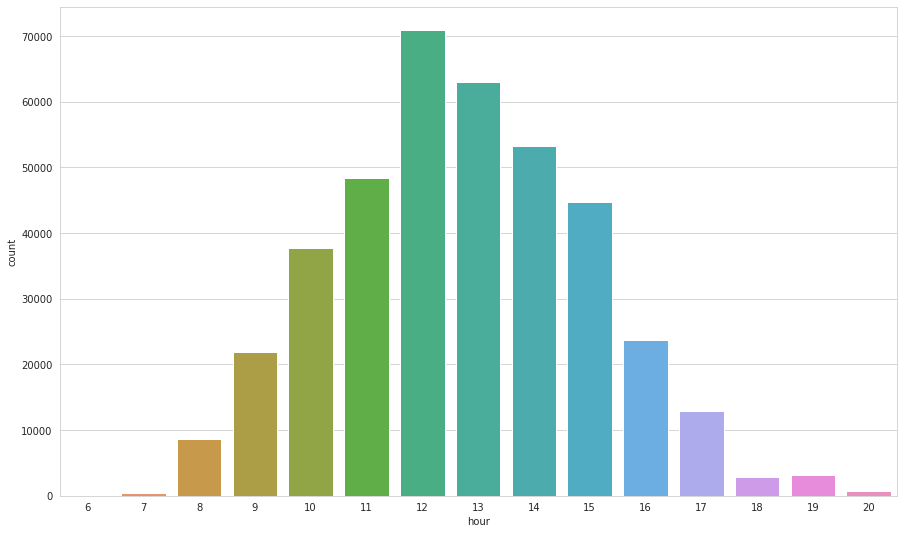

In [149]:
#visualing hourly trends in dataset 
plot_count('hour',df1)

***This clearly shows that most of our customer visits in afternoon 12 p.m. to 2 p.m.***

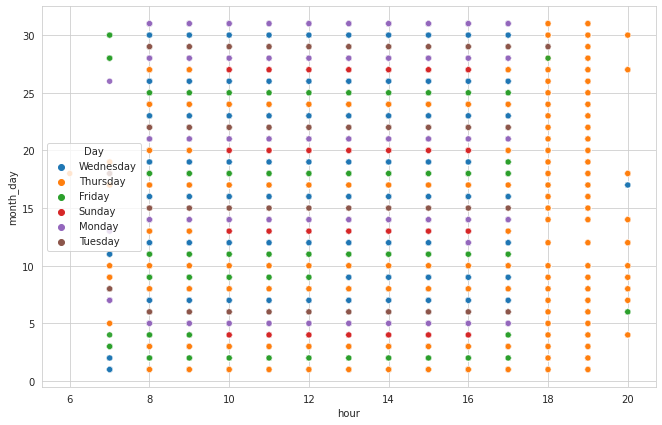

In [150]:
#plotting for hour and month_day
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='hour', y='month_day', hue='Day',data=df1,x_bins=50,y_bins=50,alpha=0.95);

***This shows that on Thursday evening we have maximum number of sales throughout the month.***

In [151]:
#creating new colum for total ammount
df1['Tot_amt']  = df1.Quantity * df1.UnitPrice

In [152]:
#checing dataset after addition of new column
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,20.34


In [153]:
#checking which customer has the maximum number of amount expenditure
max_index = df1['Tot_amt'].idxmax()
max_row = df1.loc[[max_index]]
max_row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,Friday,2011,12,9,9,168469.6


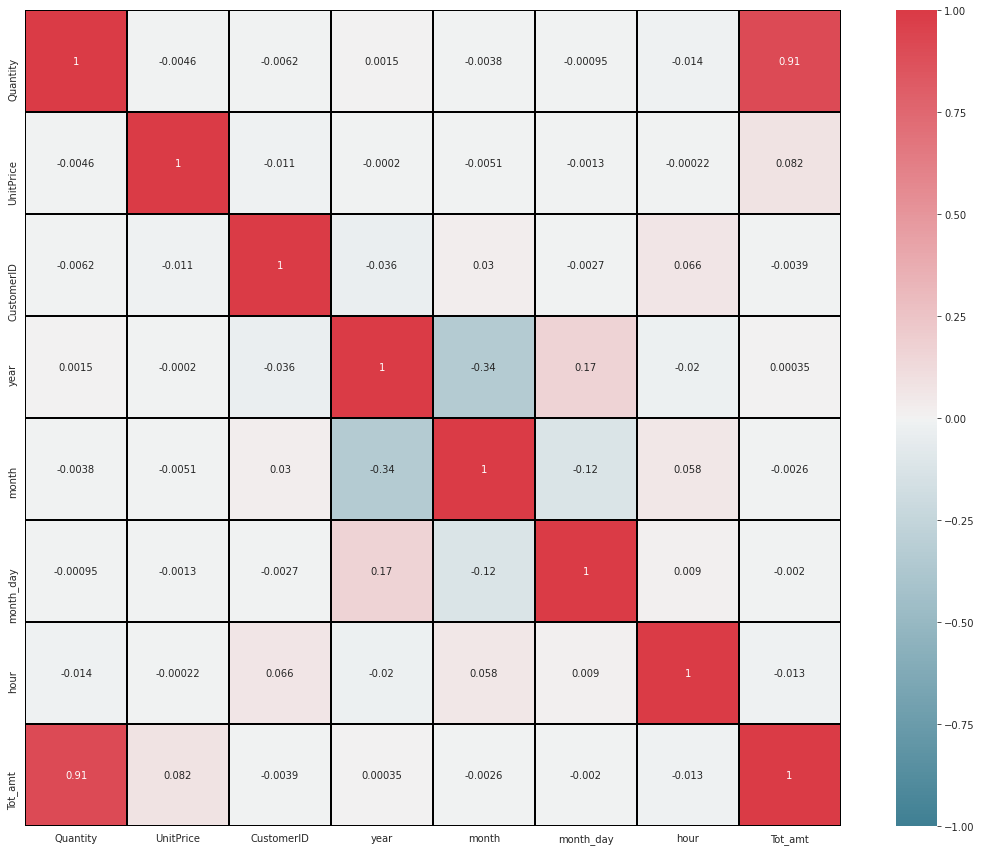

In [154]:
# how all feautures are related to each other
f, ax = plt.subplots(figsize=(20,15))
corr = df1.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

***Qunatity and unit price are highly correlated but one interesting thing to observe here is that CustomerId and hour also has a correlation that means there is a relation between specific customer and his/her visiting hour in online retail store.***  

In [155]:
#creating new dataframe for total amount expenditure by specific customer for an item
amount = df1.sort_values(by=['Tot_amt'], ascending=False)

In [156]:
#details of customer having maximum number of expenditure for an item 
amount.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,Friday,2011,12,9,9,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,Tuesday,2011,1,18,10,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,Friday,2011,6,10,15,38970.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,Tuesday,2011,5,3,13,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,Tuesday,2011,9,20,11,7144.72


In [157]:
#details of customer having lowest number of expenditure for an item 
amount.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
395529,571035,M,Manual,1,2011-10-13 12:50:00,0.0,12446.0,RSA,Thursday,2011,10,13,12,0.0
282912,561669,22960,JAM MAKING SET WITH JARS,11,2011-07-28 17:09:00,0.0,12507.0,Spain,Thursday,2011,7,28,17,0.0
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.0,16133.0,United Kingdom,Sunday,2011,9,25,12,0.0
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.0,13081.0,United Kingdom,Thursday,2011,11,10,11,0.0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,Wednesday,2011,3,23,10,0.0


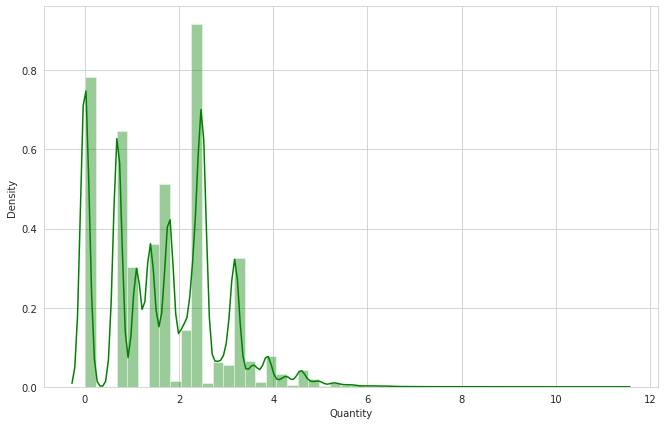

In [158]:
#visulasing distribution of quantities in datset
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(np.log(df1['Quantity']),color="g");

***So we can see that quantities purchased by customers are not normally distributed.***

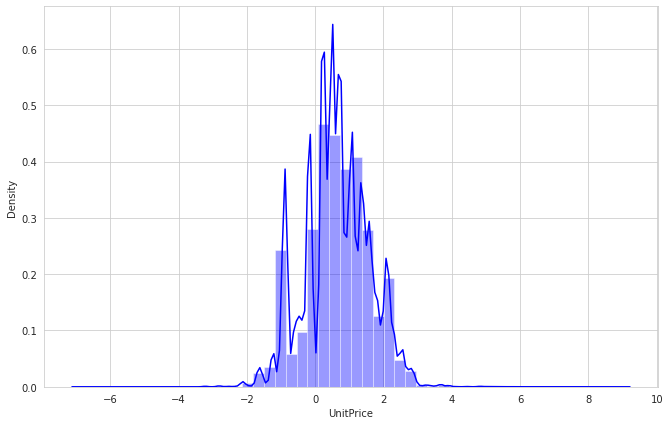

In [159]:
#visulasing distribution of quantities in datset
df2= df1[df1['UnitPrice'] != 0]
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(np.log(df2['UnitPrice']),color="b");

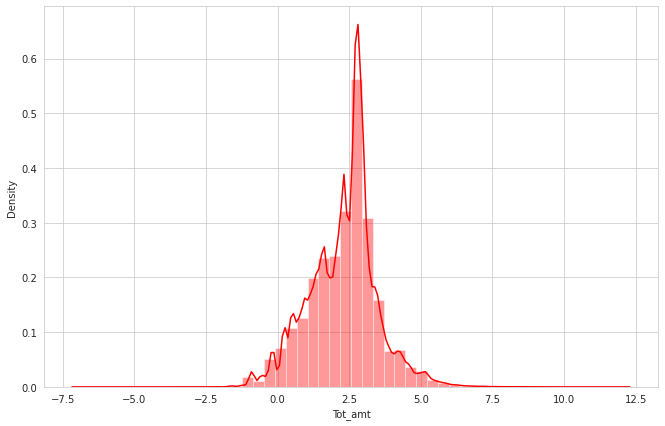

In [160]:
#visulasing distribution of total amount in datset
df2= df1[df1['Tot_amt'] != 0]
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(np.log(df2['Tot_amt']),color="r");

***We can see that total amount & unit price are close to normally distributed.*** 

In [161]:
#sns.pairplot(amount, hue="Day")

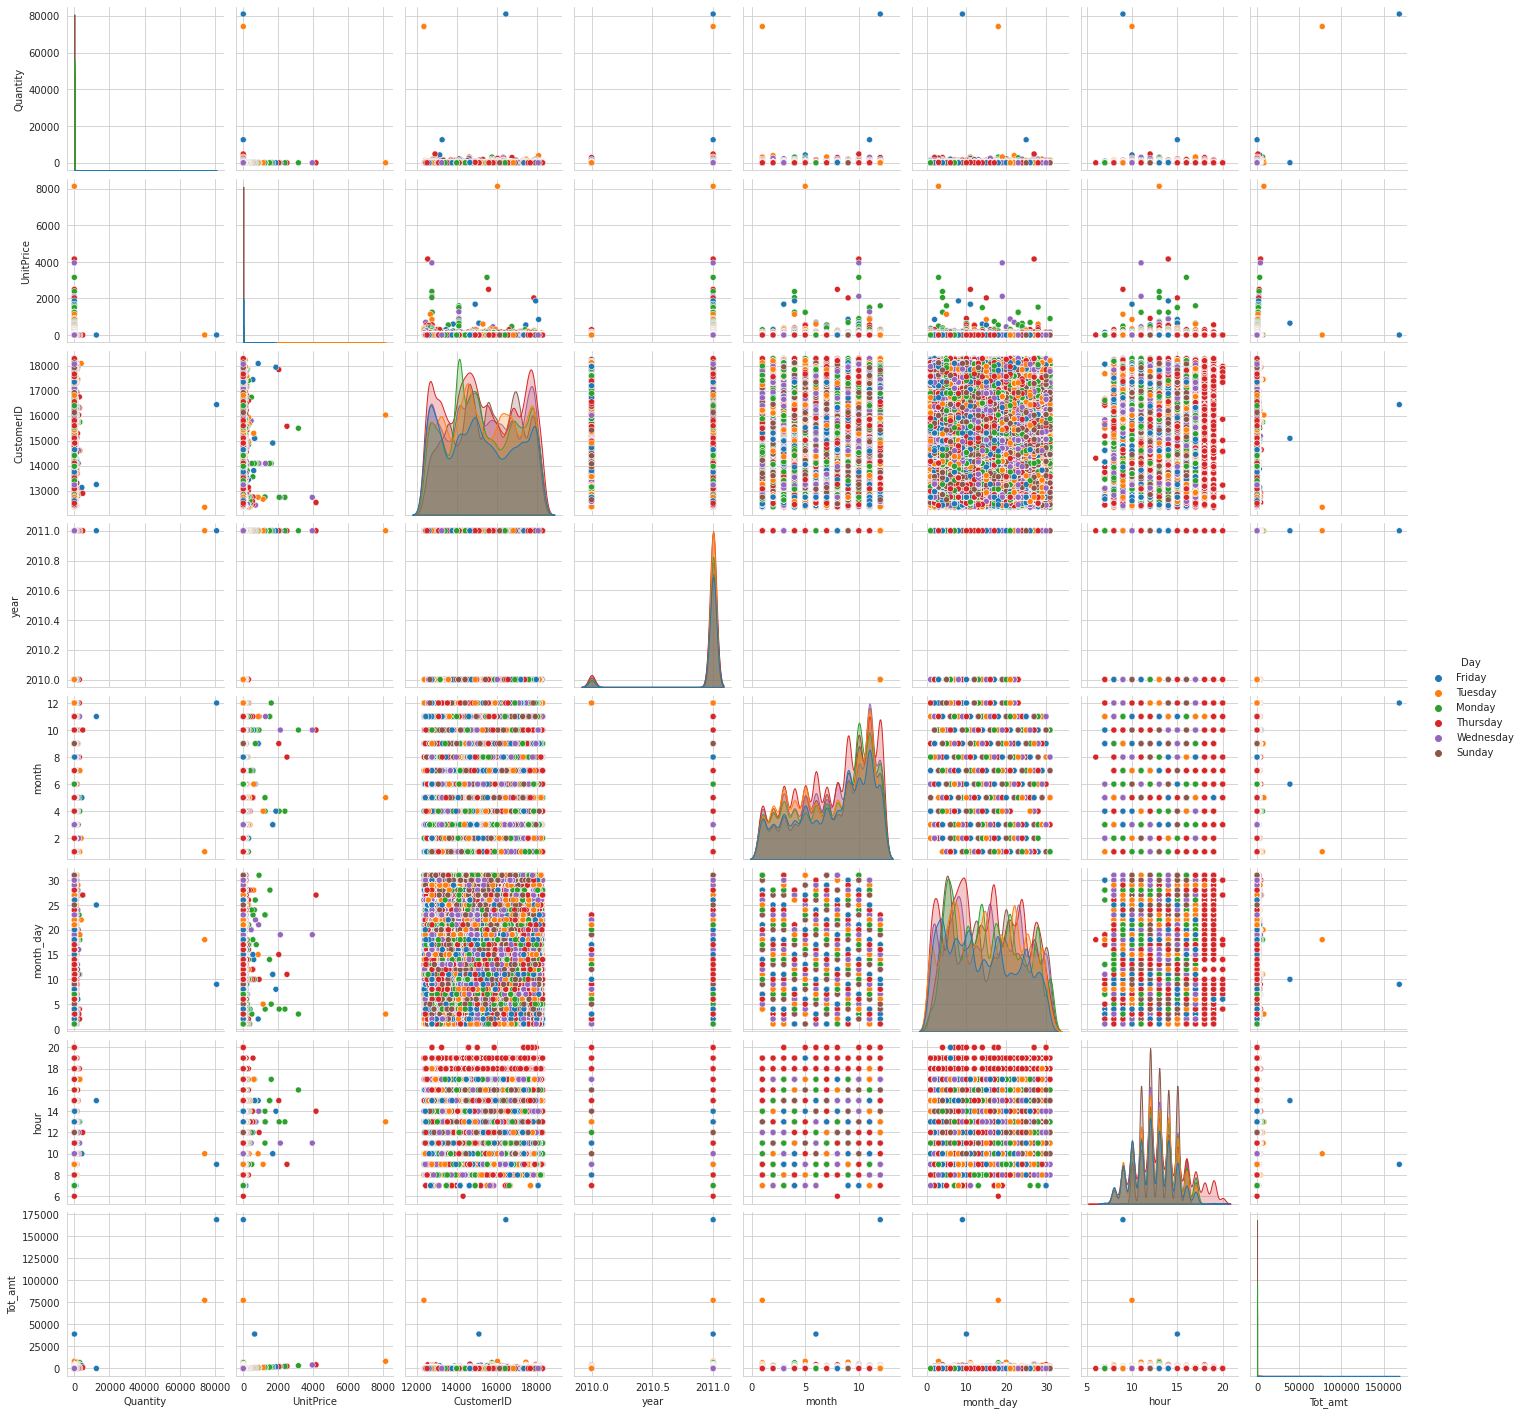

In [162]:
#creating copy of data
df_cust = df1.copy()

#***Feature Engineering***

RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Customer ID / Email / Name etc: to identify them

Recency (R) as days since last purchase: How many days ago was their last purchase?

Frequency (F) as total number of transactions: How many times has the customer purchased from our store?

Monetary (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent?

Quartiles is our recommended method to calculate RFM score

0-25 = 1st quartile

25-50 = 2nd quartile

50-75 = 3rd quartile

75-100 = 4th quartile

RFM calculations summary

Take your customer data, give a score from 1-5 to R, F and M values. Using quartiles works best since it works for all businesses and adjusts according to your data.



In [163]:
#since we have most number of customers in United kingdom so we'll focus only on this country to make clusters effectively
df_working=df1[df1.Country=='United Kingdom']

In [164]:
#checking info of our filtered and working dataset
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
 8   Day          349227 non-null  object        
 9   year         349227 non-null  int64         
 10  month        349227 non-null  int64         
 11  month_day    349227 non-null  int64         
 12  hour         349227 non-null  int64         
 13  Tot_amt      349227 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 40.0+ MB


In [165]:
#selecting specific features from dataset and creating new
uk_data=df_working[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice','Tot_amt']]

In [166]:
#first  5 observations of our UK dataset
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Tot_amt
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [167]:
#checking maximum and minimum timestamp in dataset
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

***Recency = Latest Date - Last Inovice Data***

***Frequency = count of invoice no. of transaction(s)***

***Monetary = Sum of Total Amount for each customer***

In [168]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
#creating  dataframe for Recency ,Frequency, Monetary as 'rfm'
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Tot_amt': lambda price: price.sum()})


In [170]:
#columns in rfm dataframe
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'Tot_amt'], dtype='object')

In [171]:
#renaming columns
rfm.columns=['recency','frequency','monetary']

In [172]:
#convert recency as int type
rfm['recency'] = rfm['recency'].astype(int)

In [173]:
#resetting index of dataframe
rfm.reset_index(inplace = True)
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [174]:
#checking updated names of rfm
rfm.columns

Index(['CustomerID', 'recency', 'frequency', 'monetary'], dtype='object')

###***Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.***

In [175]:
#statistical description of rfm dataset
rfm.describe()

,CustomerID,recency,frequency,monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,89.065800,1857.950687
std,1576.823683,99.528532,214.022733,7477.736186
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,17.000000,298.110000
50%,15569.000000,50.000000,40.000000,644.300000
75%,16913.000000,142.000000,98.000000,1570.810000
max,18287.000000,373.000000,7676.000000,259657.300000


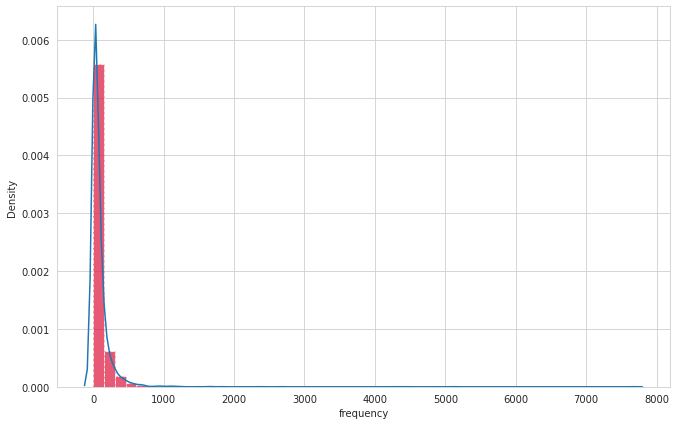

In [176]:
#checking frequency distribution in our dataset
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rfm["frequency"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7});

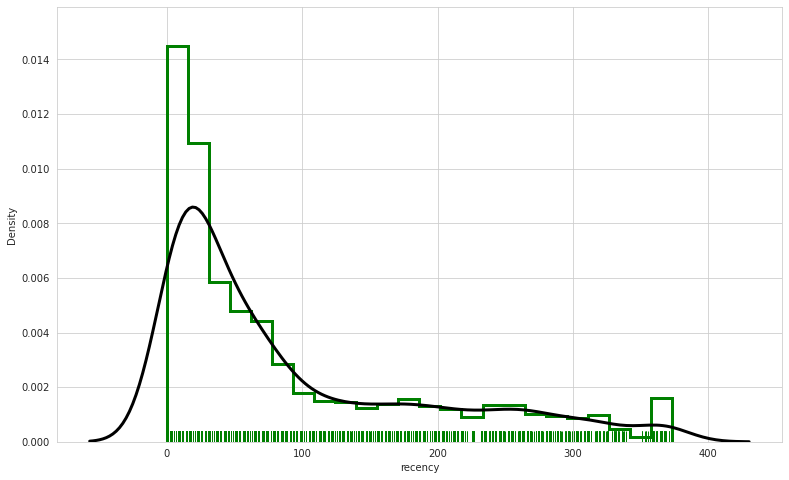

In [177]:
#checkig recency distribution in our dataset

x= rfm['recency']

plt.figure(figsize=(13,8))
sns.distplot(x, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"},
             )

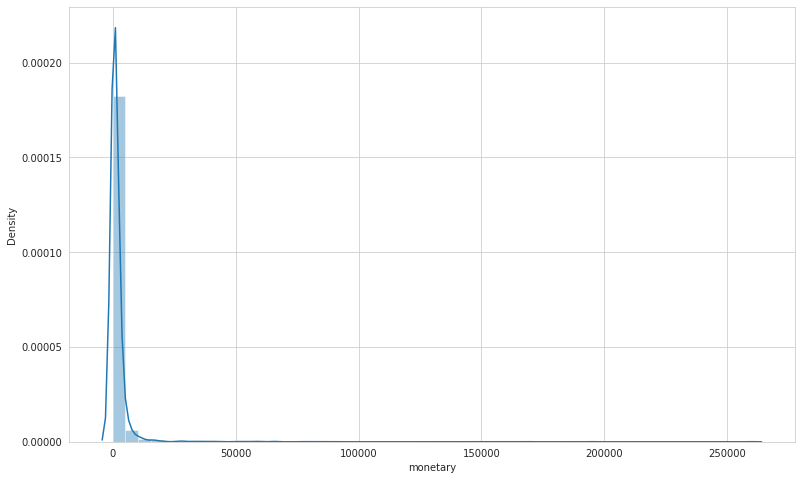

In [178]:
#checkig monetary distribution in our dataset
x = rfm['monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

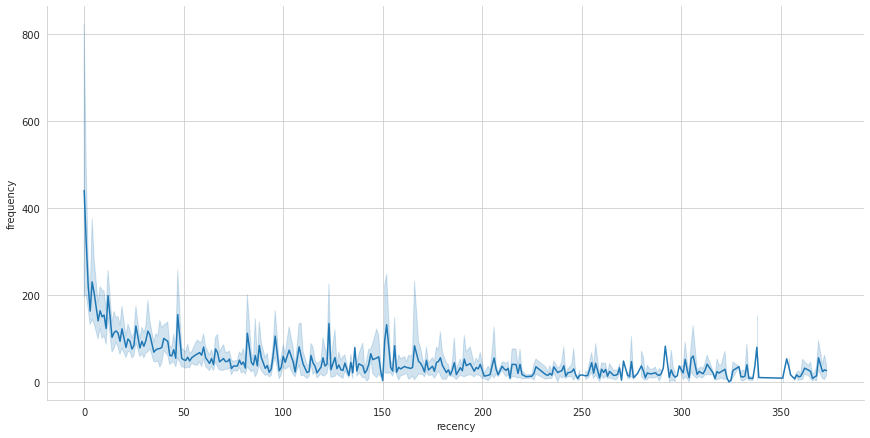

In [179]:
#plotting relationship between recency and frequency
sns.relplot(x="recency", y="frequency", kind="line", data=rfm,height=6,aspect=2 );

***As we can see that when recency goes above 20 frequency drops significantly***

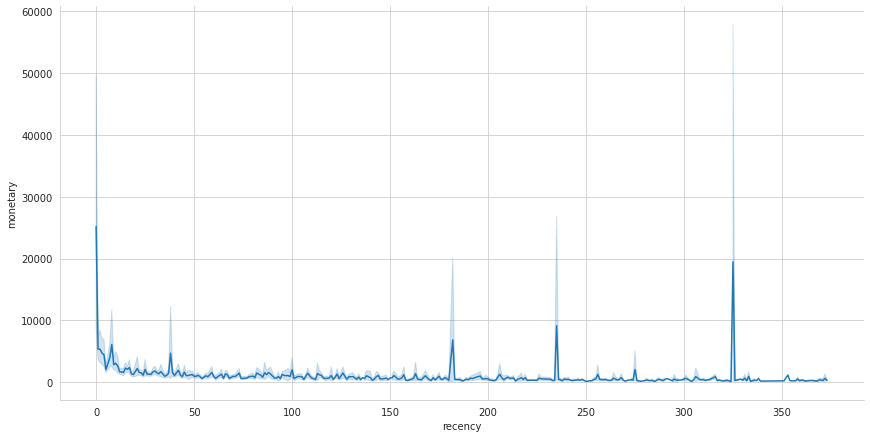

In [180]:
#plotting relationship between recency and monetary
sns.relplot(x="recency", y="monetary", kind="line", data=rfm,height=6,aspect=2);

***The sudden spikes shows that there are some customers whose arrival rate is not uniform seldom adds a good monetary value.***

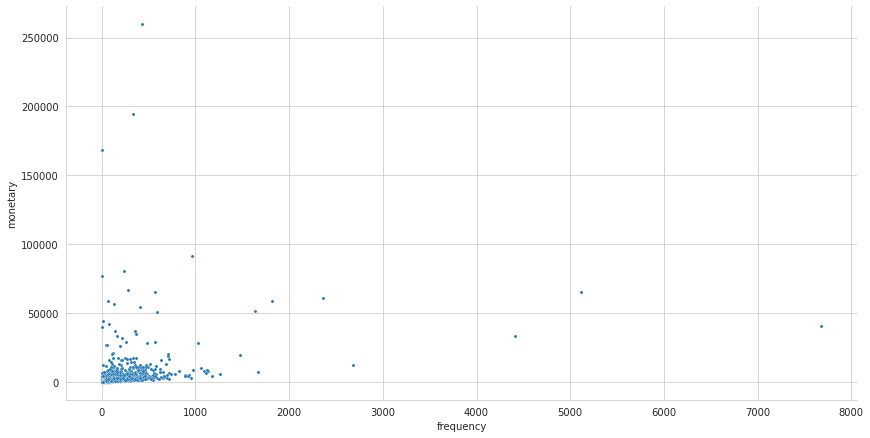

In [181]:
#plotting relationship between monetory and frequency
sns.relplot(x="frequency", y="monetary", kind="scatter", data=rfm,s=10,height=6,aspect=2);

***This shows that we have most of our monetary values comes from frequnecy<800***  

In [182]:
#defining and adding  quartiles for rfm score
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [183]:
#checking observations from updated dataset 
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4413,33053.19,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


In [184]:
#adding scores and concatenating them as 125 different observations (from 111 to 555) 
rfm['rfm_rating'] = rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)
rfm['rfm_concat'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat
0,12346.0,325,1,77183.60,4,4,1,9,441
1,12747.0,2,103,4196.01,1,1,1,3,111
2,12748.0,0,4413,33053.19,1,1,1,3,111
3,12749.0,3,199,4090.88,1,1,1,3,111
4,12820.0,3,59,942.34,1,2,2,5,122


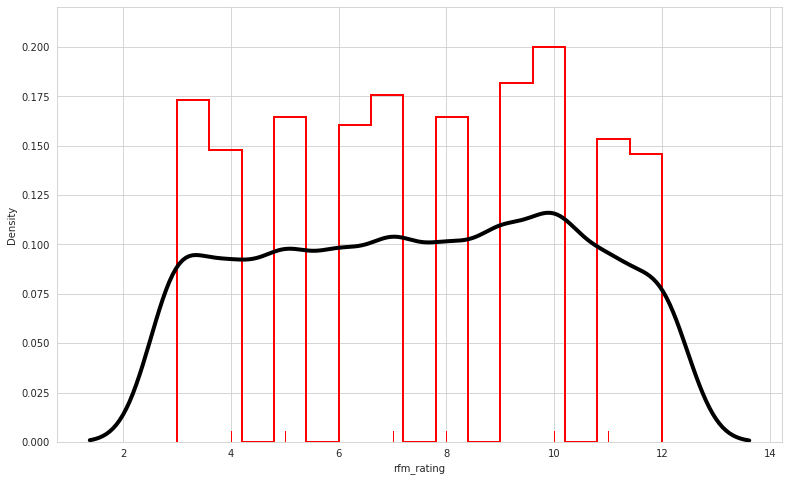

In [185]:
#plotting distribution of rfm rating
x= rfm['rfm_rating']

plt.figure(figsize=(13,8))
sns.distplot(x, rug=True, rug_kws={"color": "r"},
                  kde_kws={"color": "k", "lw": 4, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "r"},
        
             )

In [186]:
df_cust = rfm.copy()

In [187]:
df_cust.isin([0]).any().any()

True

In [188]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  3921 non-null   float64 
 1   recency     3921 non-null   int64   
 2   frequency   3921 non-null   int64   
 3   monetary    3921 non-null   float64 
 4   r_quartile  3921 non-null   category
 5   f_quartile  3921 non-null   category
 6   m_quartile  3921 non-null   category
 7   rfm_rating  3921 non-null   int64   
 8   rfm_concat  3921 non-null   object  
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 196.0+ KB


In [189]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm['recency'] = [handle_neg_n_zero(x) for x in rfm.recency]
rfm['monetary'] = [handle_neg_n_zero(x) for x in rfm.monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm[['recency', 'frequency', 'monetary']].apply(np.log, axis = 1).round(3)

In [190]:
#creating new feature by applying log on values after removing zero and neagtive values from rfm
from sklearn import preprocessing
from numpy import math
rfm['recency_log'] = rfm['recency'].apply(math.log)
rfm['frequency_log'] = rfm['frequency'].apply(math.log)
rfm['monetary_log'] = rfm['monetary'].apply(math.log)

#***Applying Unsupervised Algorithm for clustering***

In [191]:
#importing libraries and model
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


#selecting data for preprocessig(scaling) & training for fitting on our model
from sklearn.cluster import KMeans
rec_mon=['recency_log','monetary_log']
X_features_rec_mon=rfm[rec_mon].values
scaler=preprocessing.StandardScaler()
X_rm=scaler.fit_transform(X_features_rec_mon)
X=X_rm
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42245969115581433
For n_clusters = 3, silhouette score is 0.34647814404042004
For n_clusters = 4, silhouette score is 0.3659009578745068
For n_clusters = 5, silhouette score is 0.33815088655582626
For n_clusters = 6, silhouette score is 0.34151260721399795
For n_clusters = 7, silhouette score is 0.34305193363546427
For n_clusters = 8, silhouette score is 0.33871547498052823
For n_clusters = 9, silhouette score is 0.3464669604583259
For n_clusters = 10, silhouette score is 0.3481795900236429
For n_clusters = 11, silhouette score is 0.3366117871153012
For n_clusters = 12, silhouette score is 0.3441125788064102
For n_clusters = 13, silhouette score is 0.34197004765145994
For n_clusters = 14, silhouette score is 0.3410625358731325
For n_clusters = 15, silhouette score is 0.3360121159847409


***We have good silhouette score for 2 clusters.***

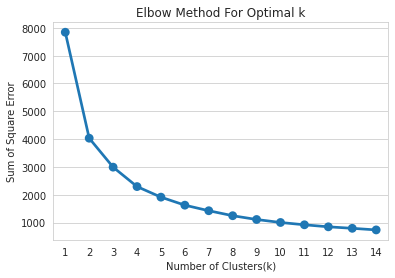

In [192]:
#visualising by elbow method
sse = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sse[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Error')
plt.title('Elbow Method For Optimal k')
plt.show()

In [193]:
#defining clusters as 2 and applying kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

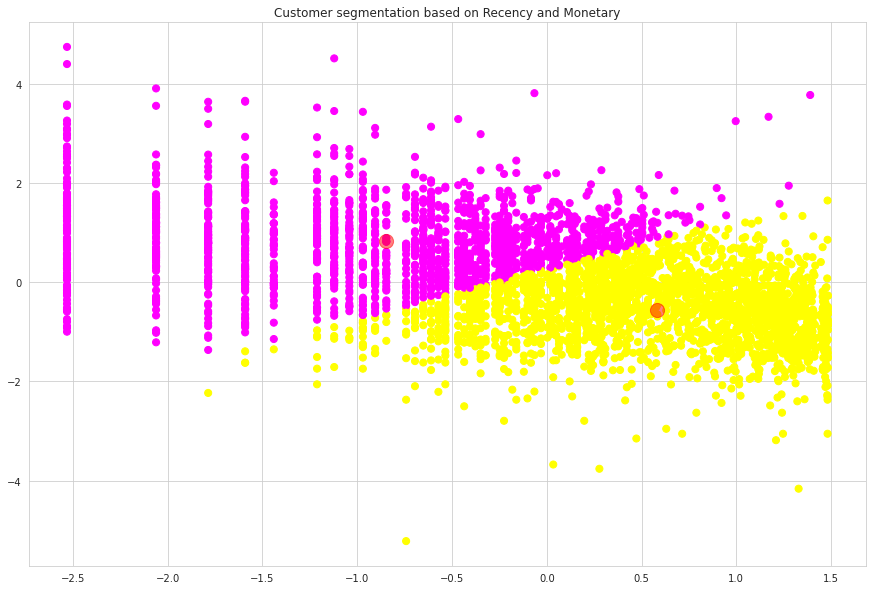

In [194]:
#plotting segmentation based on Recency and Monetary
plt.figure(figsize=(15,10))
plt.title('Customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

***According to this we have only two clusters of customers.***

In [195]:
#taking as values and transforming in our dataset 
feature_vector=['recency_log','frequency_log','monetary_log']
X_features=rfm[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.39564327592299686
For n_clusters = 3 The average silhouette_score is : 0.30681290240921677
For n_clusters = 4 The average silhouette_score is : 0.2984659739981942
For n_clusters = 5 The average silhouette_score is : 0.28066853006266396
For n_clusters = 6 The average silhouette_score is : 0.2781574659497782


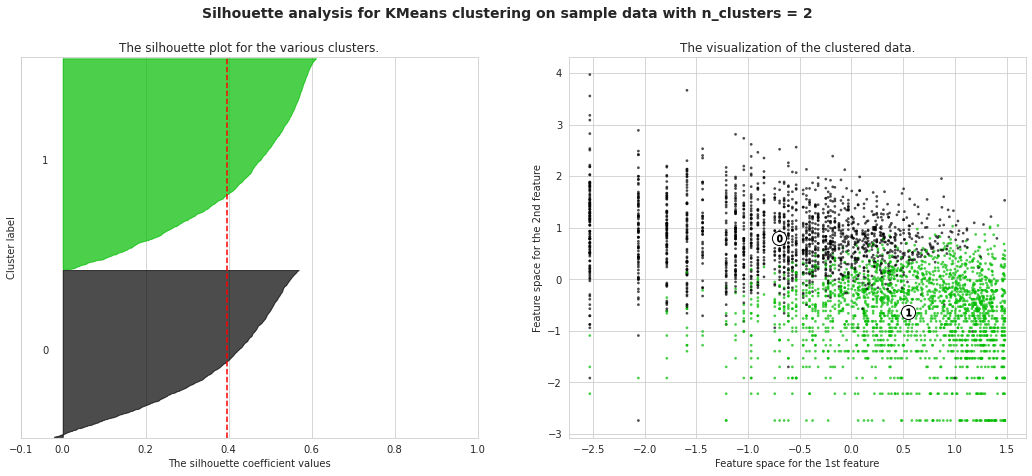

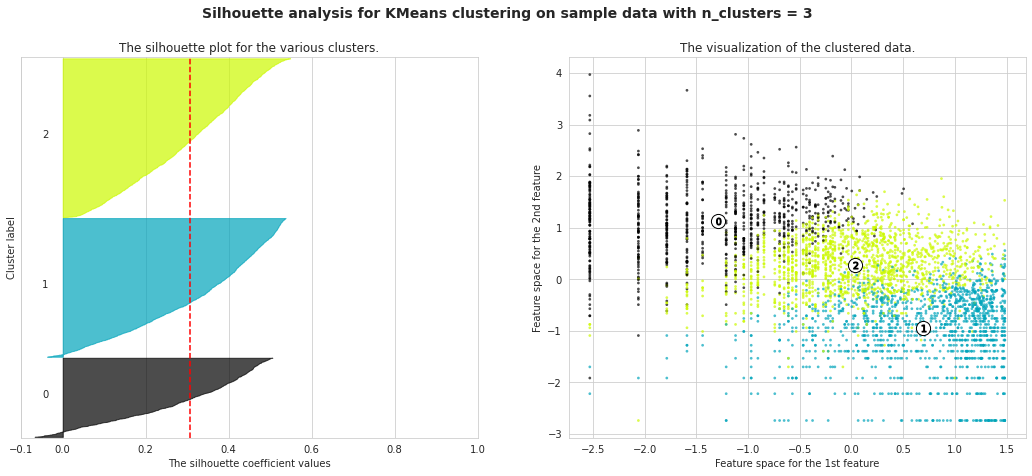

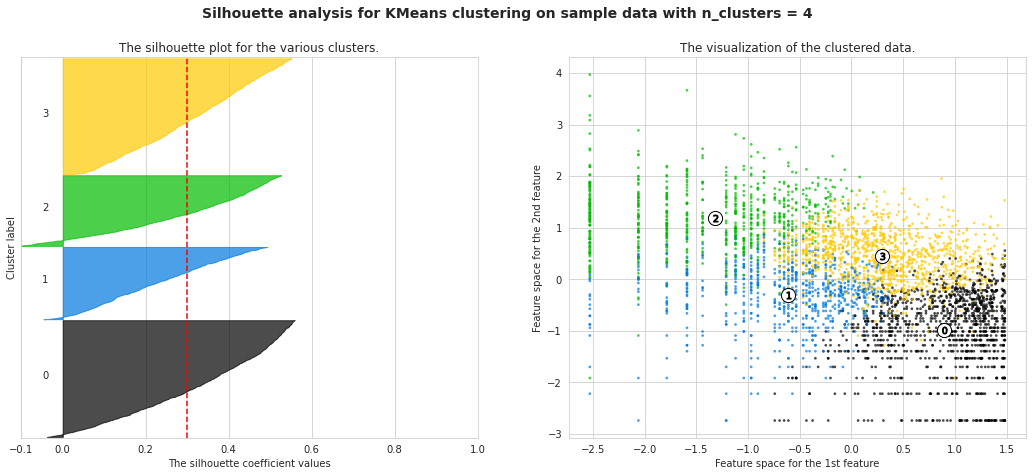

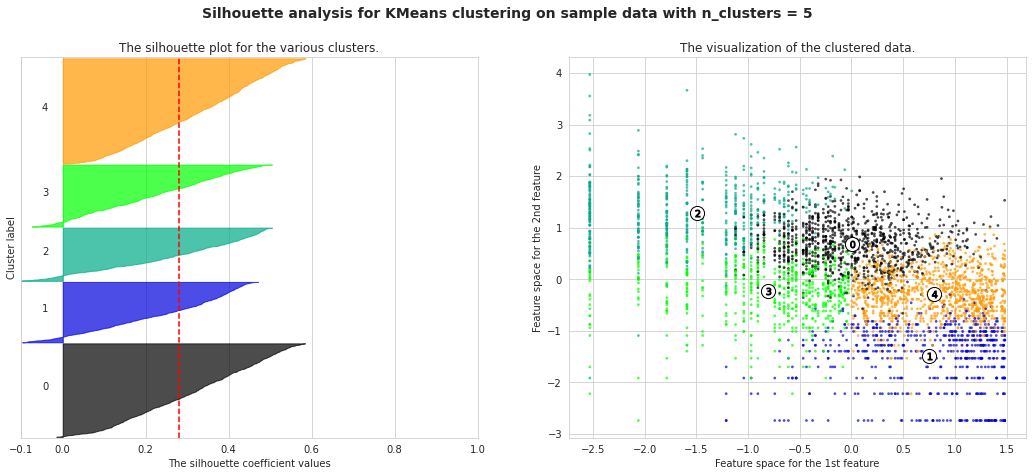

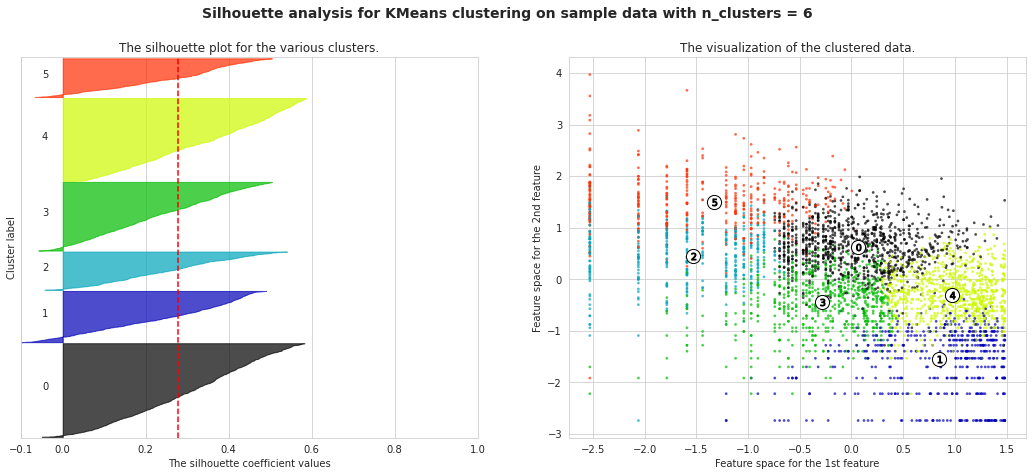

In [196]:
#applying silhoutte score method
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

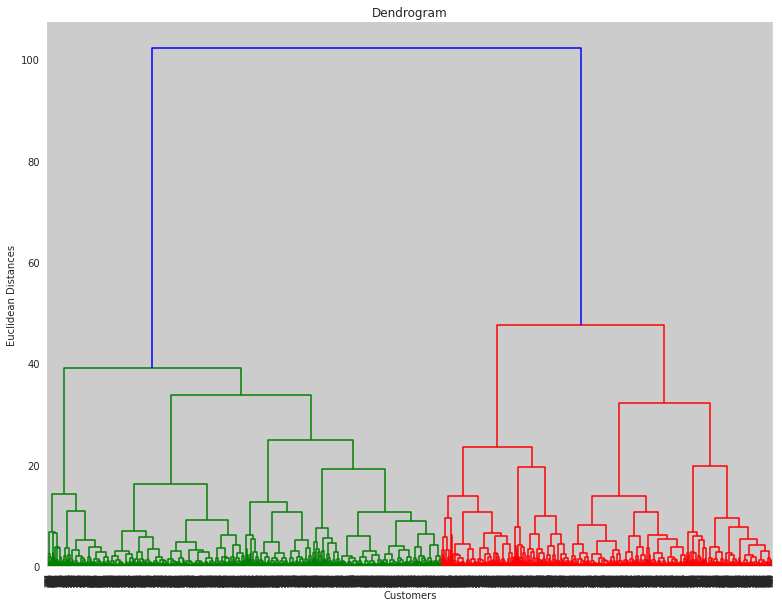

In [197]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [198]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

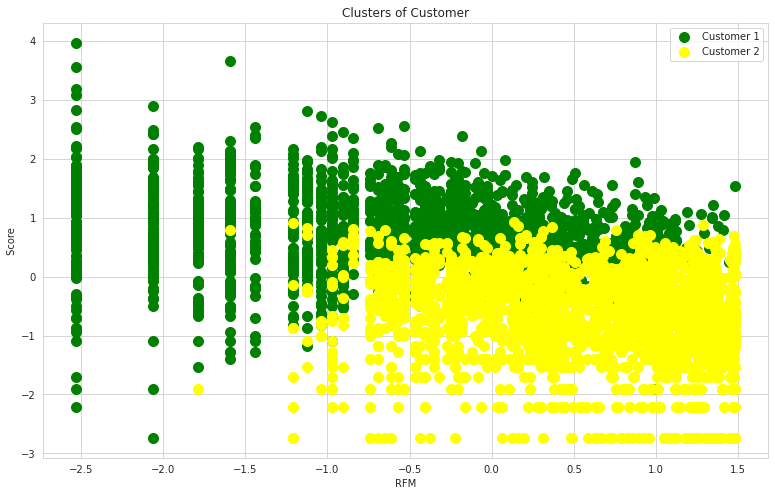

In [199]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Customer 2')


plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel(' Score ')
plt.legend()
plt.show()

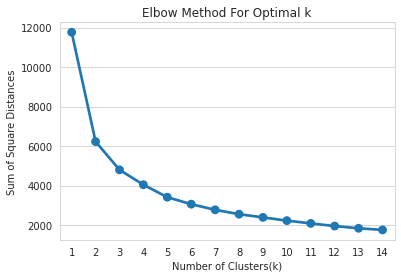

In [200]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***Making 4 clusters according to elbow method***

In [201]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Finding the clusters and assigning values for the observation given in the dataset
rfm['Cluster'] = KMean_clust.labels_
rfm.head(10)

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster
0,12346.0,325,1,77183.60,4,4,1,9,441,5.783825,0.000000,11.253942,1
1,12747.0,2,103,4196.01,1,1,1,3,111,0.693147,4.634729,8.341889,2
2,12748.0,1,4413,33053.19,1,1,1,3,111,0.000000,8.392310,10.405873,2
3,12749.0,3,199,4090.88,1,1,1,3,111,1.098612,5.293305,8.316515,2
4,12820.0,3,59,942.34,1,2,2,5,122,1.098612,4.077537,6.848366,2
5,12821.0,214,6,92.72,4,4,4,12,444,5.365976,1.791759,4.529584,3
6,12822.0,70,46,948.88,3,2,2,7,322,4.248495,3.828641,6.855282,1
7,12823.0,74,5,1759.50,3,4,1,8,341,4.304065,1.609438,7.472785,3
8,12824.0,59,25,397.12,3,3,3,9,333,4.077537,3.218876,5.984239,0
9,12826.0,2,91,1474.72,1,2,2,5,122,0.693147,4.510860,7.296223,2


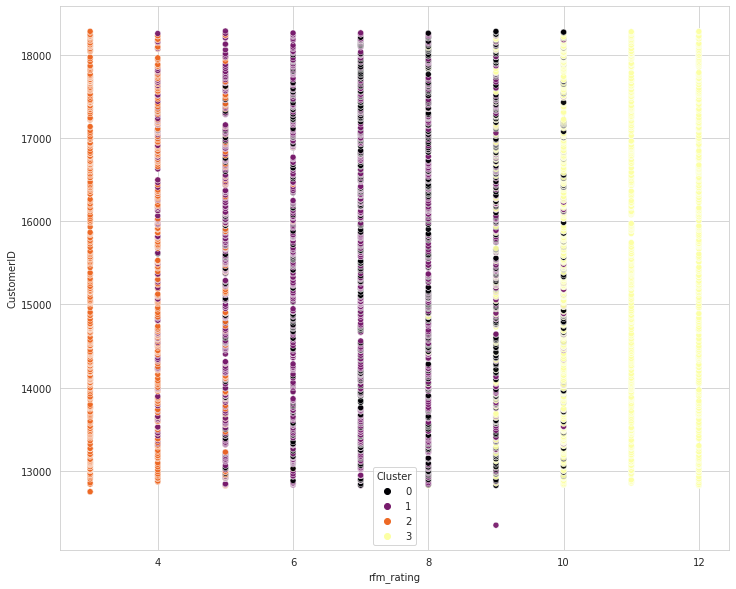

In [210]:
#plotting for hour and month_day
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(x='rfm_rating', y='CustomerID', hue='Cluster',palette='inferno',data=rfm,x_bins=50,y_bins=50,alpha=0.95);

***This shows that we have highest rfm_rating for 3rd cluster. But there is a caveat rfm rating has maximum values as 12 but recency value should be less in order to have observation of a good customer.*** 

In [203]:
#creating new colum for frequency and monetary value
rfm['freq_mont']  = rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)

In [204]:
#checking top 2 values
rfm.head(2)

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster,freq_mont
0,12346.0,325,1,77183.60,4,4,1,9,441,5.783825,0.000000,11.253942,1,5
1,12747.0,2,103,4196.01,1,1,1,3,111,0.693147,4.634729,8.341889,2,2


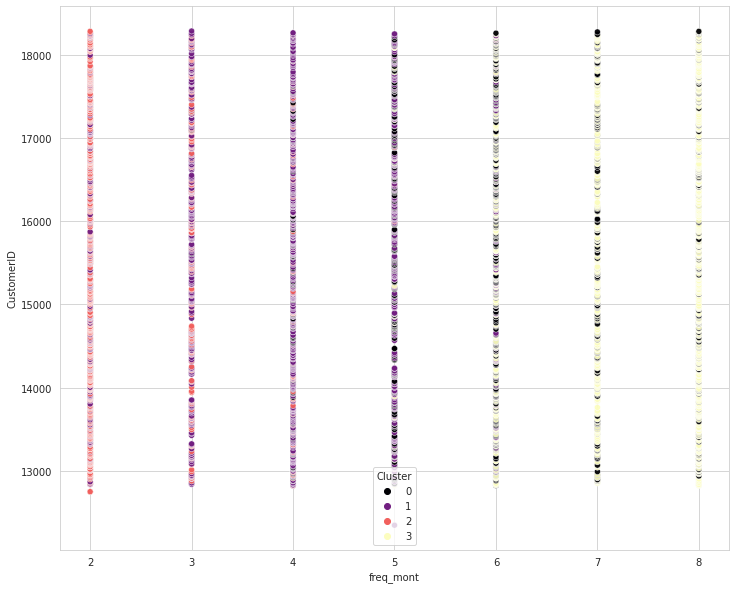

In [209]:
#plotting for hour and month_day
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(x='freq_mont', y='CustomerID', hue='Cluster',palette='magma',data=rfm,x_bins=50,y_bins=50,alpha=0.95);

***From this we can observe that cluster 3 have the maximum value of frequency and monetary i.e. above 6 so we can focus and manage our resources more effectively on these observations for each cluster. Cluster 2 is our those customer having low frequency and monetary value.***

In [212]:
#checking how many such cutomers are there for good frequency and monetary score rating
c1=rfm.loc[rfm['freq_mont'] > 6]
c1

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster,freq_mont
5,12821.0,214,6,92.72,4,4,4,12,444,5.365976,1.791759,4.529584,3,8
12,12829.0,336,11,293.00,4,4,4,12,444,5.817111,2.397895,5.680173,3,8
14,12831.0,262,9,215.05,4,4,4,12,444,5.568345,2.197225,5.370871,3,8
19,12837.0,173,12,134.10,4,4,4,12,444,5.153292,2.484907,4.898586,3,8
31,12852.0,294,17,311.55,4,4,3,11,443,5.683580,2.833213,5.741560,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,18277.0,58,8,110.38,3,4,4,11,344,4.060443,2.079442,4.703929,3,8
3915,18278.0,73,9,173.90,3,4,4,11,344,4.290459,2.197225,5.158480,3,8
3916,18280.0,277,10,180.60,4,4,4,12,444,5.624018,2.302585,5.196285,3,8
3917,18281.0,180,7,80.82,4,4,4,12,444,5.192957,1.945910,4.392224,3,8


In [207]:
#checking those customers having low frequency and monetary rating 
c2=rfm.loc[rfm['freq_mont'] < 4]
c2

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_rating,rfm_concat,recency_log,frequency_log,monetary_log,Cluster,freq_mont
0,12346.0,325,1,77183.60,4,4,1,9,441,5.783825,0.000000,11.253942,1,5
1,12747.0,2,103,4196.01,1,1,1,3,111,0.693147,4.634729,8.341889,2,2
2,12748.0,1,4413,33053.19,1,1,1,3,111,0.000000,8.392310,10.405873,2,2
3,12749.0,3,199,4090.88,1,1,1,3,111,1.098612,5.293305,8.316515,2,2
4,12820.0,3,59,942.34,1,2,2,5,122,1.098612,4.077537,6.848366,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,18263.0,25,61,1213.16,2,2,2,6,222,3.218876,4.110874,7.100984,1,4
3906,18265.0,72,46,801.51,3,2,2,7,322,4.276666,3.828641,6.686497,1,4
3910,18272.0,2,166,3078.58,1,1,1,3,111,0.693147,5.111988,8.032224,2,2
3919,18283.0,3,721,2045.53,1,1,1,3,111,1.098612,6.580639,7.623412,2,2


***So we have total of 1129 customers having very high frequency and monetary(spending score) and 2139 customers having low frequency and monetary values.***

***We can target this cluster of 1129 Customers by identifying them via ID and can do some strategic planning to target each segment.***

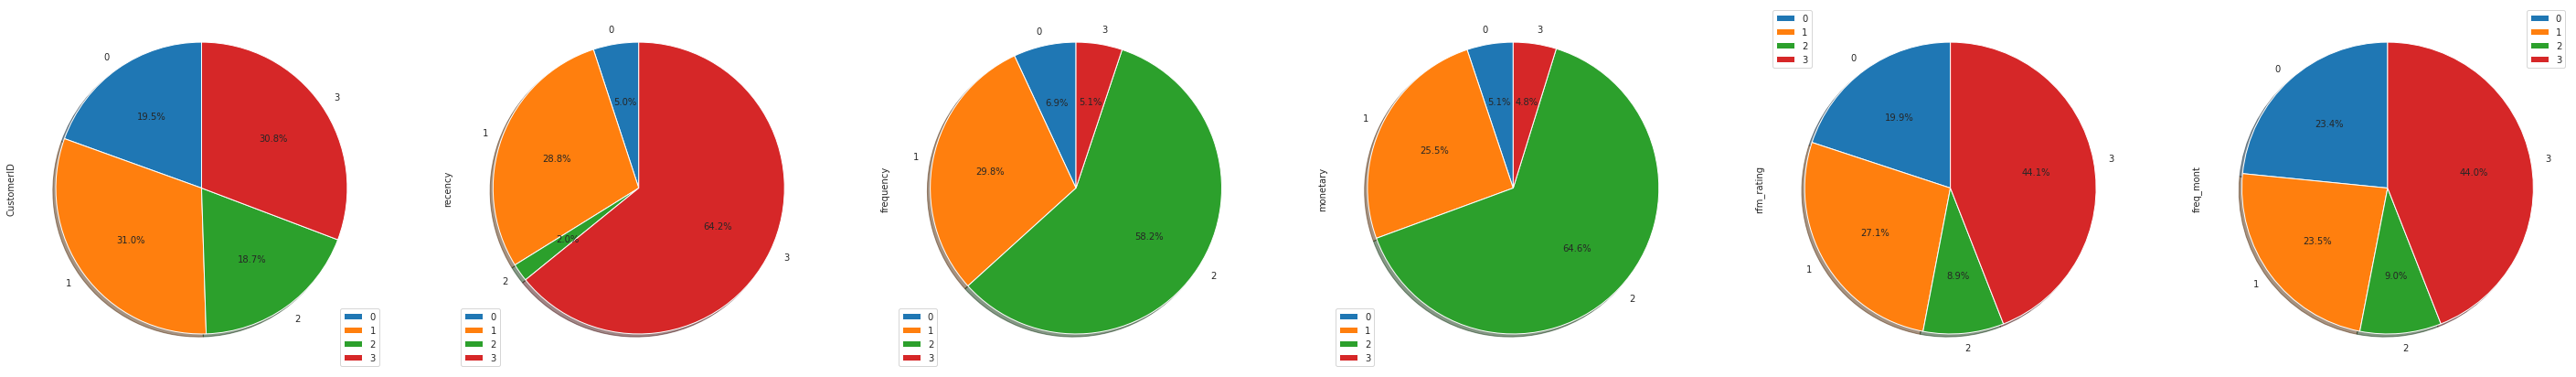

In [208]:
#visualising all clsuters with pie chart
pie_df = rfm[['CustomerID', 'recency','frequency', 'monetary','rfm_rating', 'freq_mont','Cluster']]

pie_df.groupby(['Cluster']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(50,10), autopct='%1.1f%%');

***This shows that we have 31% of customers belonging to 3rd cluster and they also contribute to our 5% monetary value. Also note that 65% of our monetary value comes from cluster 2 having very less rfm rating. Similarly we can observe for others.*** 

#***Conclusion-***
1.***United Kingdom and Saudi arabia has highest and lowest occurence in the dataset.*** 

2.***Month of November has highest sale. Similarly in weekdays Thursday have highest sale.***

3.***We can cluster our customers in two segments as loyal and  normal customers.***